In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [49]:
hy=  pd.read_csv('output_0316_6_forKNN.csv')
avg= pd.read_csv('HY_Category_avg_031623.csv')

In [50]:
hy.head(3)

,10/31/22 MTD,11/30/22 MTD,12/31/22 MTD,01/31/23 MTD,02/28/23 MTD,Cluster
0,5.91,5.71,-0.53,5.15,-4.86,1
1,8.18,0.07,-0.83,3.06,-0.35,1
2,0.98,2.82,-1.15,5.73,2.45,2


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
scaler.fit(hy.drop('Cluster',axis=1))

StandardScaler()

In [54]:
scaled_features = scaler.transform(hy.drop('Cluster',axis=1))

In [56]:
df_feat = pd.DataFrame(scaled_features,columns=hy.columns[:-1])
df_feat.head()

,10/31/22 MTD,11/30/22 MTD,12/31/22 MTD,01/31/23 MTD,02/28/23 MTD
0,0.795877,0.746706,-0.062274,0.346748,-1.179642
1,1.328098,-0.377540,-0.143747,-0.181637,0.129544
2,-0.360004,0.170630,-0.230651,0.493381,0.942342
3,-0.005971,-0.877869,-2.810609,1.787796,3.676829
4,0.263656,-1.073216,-3.763835,-1.220708,6.007819


In [57]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,hy['Cluster'],
                                                    test_size=0.30)

In [59]:
#USING KNN
from sklearn.neighbors import KNeighborsClassifier

In [72]:
#Starting with 5
knn = KNeighborsClassifier(n_neighbors=6)

In [73]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [74]:
pred = knn.predict(X_test)

In [75]:
#Predictions and Evaluations
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(confusion_matrix(y_test,pred))

[[302   5   0   0   0   0]
 [ 15  71   0   0   0   0]
 [ 19   2  27   0   0   0]
 [  3   0   0   3   0   0]
 [  0   0   2   0   7   0]
 [  0   0   3   0   0   6]]


In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       307
           1       0.91      0.83      0.87        86
           2       0.84      0.56      0.68        48
           3       1.00      0.50      0.67         6
           4       1.00      0.78      0.88         9
           5       1.00      0.67      0.80         9

    accuracy                           0.89       465
   macro avg       0.94      0.72      0.80       465
weighted avg       0.90      0.89      0.89       465



In [78]:
#Choosing a K value
error_rate = []

# Used 5 to 15 as "appropriate" cluster category sizes.  More/Less make less sense.
for i in range(5,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

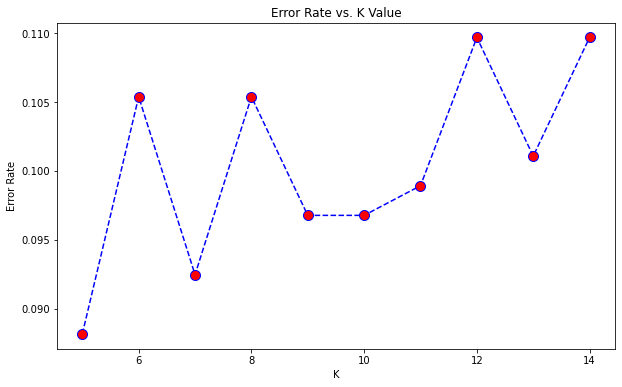

In [80]:
plt.figure(figsize=(10,6))
plt.plot(range(5,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')